# sciki-learn中的主成分分析(PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
Y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=666)

In [4]:
X_train.shape

(1347, 64)

In [5]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)

Wall time: 83.8 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
knn_clf.score(X_test, Y_test)

0.9866666666666667

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
# 数据降维到2个维度
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [8]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, Y_train)

Wall time: 998 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
knn_clf.score(X_test_reduction, Y_test)

0.6066666666666667

In [10]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [11]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

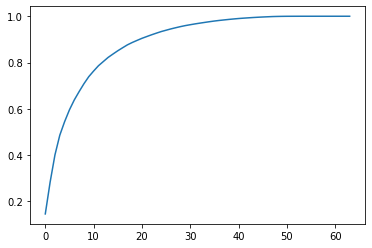

In [13]:
plt.plot([i for i in range(X_train.shape[1])], [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [14]:
pca = PCA(0.95)
pca.fit(X_train)
pca.n_components_

28

In [15]:
# 数据降维到2个维度
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [16]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, Y_train)

Wall time: 2.99 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn_clf.score(X_test_reduction, Y_test)

0.98

In [18]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

In [19]:
X_reduction.shape

(1797, 2)

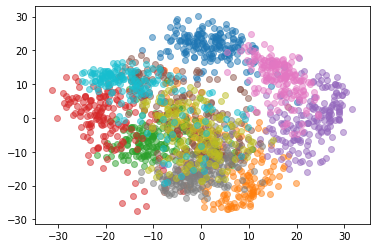

In [21]:
for i in range(10):
    plt.scatter(X_reduction[Y==i,0], X_reduction[Y==i, 1], alpha=0.8)

plt.show()